In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import datetime as dt
from datetime import timedelta
import json
import os
import csv
import matplotlib.pyplot as plt


In [2]:
localdir=os.getcwd()
# localdir

In [3]:
localdir

'C:\\Users\\vchiluveru\\Downloads\\VB\\KL\\GRA\\Agents'

In [4]:
folder_list=[folder for folder in os.listdir(localdir) if 'Agents_' in folder]
print(len(folder_list), os.listdir(folder_list[0]))

24 ['2024-09-05-9.log', '2024-09-05-9.log.gz', 'Agents_A10.json']


In [5]:
player_names_list = ['Alan', 'Kalyani', 'Lamar', 'Sarah', 'Sokka']

In [6]:
player_profession_dict = {}

for ent in data_load['participants']:
    player_profession_dict[ent['name']] = ent['profession'] 
player_profession_dict

NameError: name 'data_load' is not defined

In [7]:
ACCEPTED = 'ACCEPTED'
DECLINED = 'DECLINED'
CANCELLED = 'CANCELLED'

game_trades_df_dict = {}
game_final_df_dict = {}
game_list = []
gametype_list = []
winner_list = []
score_list = []

player_profession_dict = {}

for folder in folder_list:
    print(folder)
    score_file=[item for item in os.listdir(folder) if '.json' in item][0]
    print(score_file)
    data=open(os.path.join(localdir,folder,score_file), encoding='utf8')
    data_load=json.load(data)
    player_profession_dict[folder] = {}
    for ent in data_load['participants']:
        player_profession_dict[folder][ent['name']] = ent['profession'] 
    trades_df=df.from_records(data_load["trades"])
    for ind in trades_df.index:
        trades_df.loc[ind,"beginTimestamp"]=pd.Timestamp(trades_df.loc[ind,"beginTimestamp"])
        trades_df.loc[ind,"endTimestamp"]=pd.Timestamp(trades_df.loc[ind,"endTimestamp"])
    print(trades_df.shape, folder)
    trades_df = trades_df[(trades_df['status']==ACCEPTED)]
    print(trades_df.shape, folder)
    game_trades_df_dict[folder] = trades_df
    # final_df=df.from_records(data_load['participants'])
    # game_final_df_dict[folder] = final_df
    # winner_list.append(data_load['winner'])
    # game_list.append(folder.split('_')[1])
    # if 'A' in folder.split('_')[1]:
        # gametype_list.append('Competitive')
    # elif 'B' in folder.split('_')[1]:
        # gametype_list.append('Baseline')
    # else:
        # gametype_list.append('Cooperative')
    # score_list.append(data_load['score'])

# winner_df = df({'game':game_list, 'gametype':gametype_list, 'winner':winner_list,'score':score_list})
professions_set = set([player_profession_dict[folder][player] for folder in player_profession_dict for player in player_profession_dict[folder]])

Agents_A10
Agents_A10.json
(54, 14) Agents_A10
(26, 14) Agents_A10
Agents_A3
Agents_A3.json
(36, 14) Agents_A3
(19, 14) Agents_A3
Agents_A4
Agents_A4.json
(64, 14) Agents_A4
(34, 14) Agents_A4
Agents_A5
Agents_A5.json
(48, 14) Agents_A5
(30, 14) Agents_A5
Agents_A6
Agents_A6.json
(34, 14) Agents_A6
(16, 14) Agents_A6
Agents_A7
Agents_A7.json
(35, 14) Agents_A7
(24, 14) Agents_A7
Agents_A8
Agents_A8.json
(65, 14) Agents_A8
(39, 14) Agents_A8
Agents_A9
Agents_A9.json
(32, 14) Agents_A9
(21, 14) Agents_A9
Agents_B10
Agents_B10.json
(60, 14) Agents_B10
(41, 14) Agents_B10
Agents_B3
Agents_B3.json
(68, 14) Agents_B3
(21, 14) Agents_B3
Agents_B4
Agents_B4.json
(92, 14) Agents_B4
(20, 14) Agents_B4
Agents_B5
Agents_B5.json
(61, 14) Agents_B5
(33, 14) Agents_B5
Agents_B6
Agent_B6.json
(50, 14) Agents_B6
(25, 14) Agents_B6
Agents_B7
Agents_B7.json
(54, 14) Agents_B7
(34, 14) Agents_B7
Agents_B8
Agents_B8.json
(47, 14) Agents_B8
(25, 14) Agents_B8
Agents_B9
Agents_B9.json
(68, 14) Agents_B9
(25,

In [8]:
# def get_begin_end_scores(r):
#     endscore_dict = r['endScores']
#     beginscore_dict = r['beginScores']
#     requester_beginscore = beginscore_dict['requester']
#     requester_endscore = endscore_dict['requester']
#     requested_beginscore = beginscore_dict['requested']
#     requested_endscore = endscore_dict['requested']
#     requester_scoregain = requester_endscore - requester_beginscore
#     requested_scoregain = requested_endscore - requested_beginscore
#     total_scoregain = requester_scoregain + requested_scoregain
#     print(requester_scoregain, requested_scoregain, total_scoregain)
#     r['scoregain'] = total_scoregain
#     return r

# player_trades_df = game_trades_df_dict[filename]
# player_trades_df = player_trades_df[player_trades_df['status']==ACCEPTED]
# player_trades_df = player_trades_df.apply(get_begin_end_scores, axis=1)
# player_trades_df

In [9]:
'RED_GLAZED_TERRACOTTA'.lower().replace('_',' ')

'red glazed terracotta'

In [10]:
tierItemsValueFile=open('TierITemValues.txt', encoding='utf8')
tierItemsValuelines = tierItemsValueFile.readlines()
tierItemsValueFile.close()

item_names_list = []
item_tier_list = []
item_value_list = []
itemTierValue_dict = {}
profession_items_dict = {profession: [] for profession in professions_set}

for line in tierItemsValuelines:
    # print(line)
    if 'tier1' in line:
        item_name = line.split('ItemStack(Material.')[1].split('));')[0]
        item_name = item_name.lower()
        # item_names_list.append(item_name)
        # item_tier_list.append(1)
        # item_value_list.append(1)
        # print(line)
        profession_name = line.split('tier1')[1].split('.add(')[0]
        profession_items_dict[profession_name].append(item_name)
        if item_name not in itemTierValue_dict:
            itemTierValue_dict[item_name] = {'tier': 1, 'value':1}
    elif 'tier2' in line:
        item_name = line.split('ItemStack(Material.')[1].split('));')[0]
        item_name = item_name.lower()
        # item_names_list.append(item_name)
        # item_tier_list.append(2)
        # item_value_list.append(3)
        # print(line)
        profession_name = line.split('tier2')[1].split('.add(')[0]
        profession_items_dict[profession_name].append(item_name)
        if item_name not in itemTierValue_dict:
            itemTierValue_dict[item_name] = {'tier': 2, 'value':3}
    elif 'tier3' in line:
        item_name = line.split('ItemStack(Material.')[1].split('));')[0]
        item_name = item_name.lower()
        # item_names_list.append(item_name)
        # item_tier_list.append(3)
        # item_value_list.append(10)
        # print(line)
        profession_name = line.split('tier3')[1].split('.add(')[0]
        profession_items_dict[profession_name].append(item_name)
        if item_name not in itemTierValue_dict:
            itemTierValue_dict[item_name] = {'tier': 3, 'value':10}

# itemTierValue_df = df({'item_name':item_names_list, 'tier':item_tier_list, 'value':item_value_list})
print(itemTierValue_dict)
print(profession_items_dict)

{'potato': {'tier': 1, 'value': 1}, 'carrot': {'tier': 1, 'value': 1}, 'wheat': {'tier': 1, 'value': 1}, 'bread': {'tier': 2, 'value': 3}, 'pumpkin': {'tier': 2, 'value': 3}, 'mushroom_stew': {'tier': 3, 'value': 10}, 'cod': {'tier': 1, 'value': 1}, 'salmon': {'tier': 1, 'value': 1}, 'tropical_fish': {'tier': 1, 'value': 1}, 'pufferfish': {'tier': 2, 'value': 3}, 'turtle_egg': {'tier': 2, 'value': 3}, 'oak_boat': {'tier': 3, 'value': 10}, 'beef': {'tier': 1, 'value': 1}, 'chicken': {'tier': 1, 'value': 1}, 'porkchop': {'tier': 1, 'value': 1}, 'cooked_beef': {'tier': 2, 'value': 3}, 'cooked_porkchop': {'tier': 2, 'value': 3}, 'rabbit_stew': {'tier': 3, 'value': 10}, 'iron_ingot': {'tier': 1, 'value': 1}, 'gold_ingot': {'tier': 1, 'value': 1}, 'coal': {'tier': 1, 'value': 1}, 'fletching_table': {'tier': 2, 'value': 3}, 'smithing_table': {'tier': 2, 'value': 3}, 'diamond_sword': {'tier': 3, 'value': 10}, 'leather': {'tier': 1, 'value': 1}, 'stick': {'tier': 1, 'value': 1}, 'lead': {'tier'

In [11]:
def get_trade_value(r):
    request_list = r['request']
    offer_list = r['offer']
    total_trade_value = 0
    for req in request_list:
        item_name = req['resource']
        item_num = req['amount']
        item_name = item_name.lower().replace(' ', '_')
        total_value = itemTierValue_dict[item_name]['value'] * item_num
        total_trade_value += total_value
    for req in offer_list:
        item_name = req['resource']
        item_num = req['amount']
        item_name = item_name.lower().replace(' ', '_')
        total_value = itemTierValue_dict[item_name]['value'] * item_num
        total_trade_value += total_value
    r['trade_value'] = total_trade_value
    r['game_name'] = filename.split('_')[1]
    if 'A' in filename.split('_')[1]:
        r['game_type'] = 'Competitive'
    elif 'B' in filename.split('_')[1]:
        r['game_type'] = 'Baseline'
    else:
        r['game_type'] = 'Cooperative'
    return r


In [12]:
for filename in game_trades_df_dict:
    print(filename)
    trades_df = game_trades_df_dict[filename]
    trades_df = trades_df.apply(get_trade_value, axis=1)
    game_trades_df_dict[filename] = trades_df

Agents_A10
Agents_A3
Agents_A4
Agents_A5
Agents_A6
Agents_A7
Agents_A8
Agents_A9
Agents_B10
Agents_B3
Agents_B4
Agents_B5
Agents_B6
Agents_B7
Agents_B8
Agents_B9
Agents_C1
Agents_C2
Agents_C3
Agents_C4
Agents_C5
Agents_C6
Agents_C7
Agents_C8


In [13]:
def get_request_non_useful_items(trades_df, player_names_list, player_profession_dict, profession_items_dict, filename):
    player_profession = {}
    player_useful_items = {}
    for player in player_names_list:
        player_profession[player] = player_profession_dict[filename][player]
        player_useful_items[player] = profession_items_dict[player_profession[player]]
    def row_wise_non_useful(row):
        p1 = row['requester']
        p2 = row['requested']

        request_list = row['request']
        request_items_list = [ent['resource'].lower().replace(' ', '_') for ent in request_list]
        request_non_useful_items_list = [item for item in request_items_list if item not in player_useful_items[p1]]
        offer_list = row['offer']
        offer_items_list = [ent['resource'].lower().replace(' ', '_') for ent in offer_list]
        offer_non_useful_items_list = [item for item in offer_items_list if item not in player_useful_items[p2]]
        row['requester_nonuseful'] = request_non_useful_items_list
        row['requested_nonuseful'] = offer_non_useful_items_list
        return row

    trades_df = trades_df.apply(row_wise_non_useful, axis=1)
    return trades_df



In [14]:
# three_way_trades_dict = {}

# for filename in game_trades_df_dict:
#     print(filename)
#     three_way_trades_dict[filename] = []
#     # three_way_trades_dict[filename] = {}
#     trades_df = game_trades_df_dict[filename]
#     trades_df = get_request_non_useful_items(trades_df, player_names_list, player_profession_dict, profession_items_dict, filename)
    
#     for player in player_names_list:
#         x_df = trades_df[(trades_df['requester']==player) | (trades_df['requested']==player)]

#         for i in range(len(x_df.index)-1):
#             N = len(x_df.index)
#             row = x_df.loc[x_df.index[i], :]
#             p1 = row['requester']
#             p2 = row['requested']
#             if p1 == player:
#                 # check requester_nonuseful
#                 p1_non_useful = row['requester_nonuseful']
#                 # p2_non_useful = row['requested_nonuseful']
#                 if len(p1_non_useful):
#                     # p1 got non-useful items
#                     # when does he trade these items, if at all, after how many trades
#                     for j in np.arange(1, N-i):
#                         row_n1 = x_df.loc[x_df.index[i+j], :]
#                         if row_n1['requester'] == player:
#                             # check offer items
#                             items_n1 = [ent['resource'] for ent in row_n1['offer']]
#                             items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
#                             # within items in offer, check if at least 1 item is from previous non_useful
#                             traded_nonuseful_items_list = [item for item in items_n1 if item in p1_non_useful]
#                             if len(traded_nonuseful_items_list):
#                                 # 3-way trade occured
#                                 three_way_trades_dict[filename].append(
#                                     {'player': player, 'trade1': i+1, 'trade2': i+j+1, 'count': j,
#                                      'non_useful_items1': p1_non_useful, 'non_useful_items2': traded_nonuseful_items_list,
#                                      'game_type': row_n1['game_type'],  'game_name': row_n1['game_name'],
#                                      'trade1_ind': x_df.index[i], 'trade2_ind': x_df.index[i+j]})
#                         elif row_n1['requested'] == player:
#                             # check request items
#                             items_n1 = [ent['resource'] for ent in row_n1['request']]
#                             items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
#                             # within items in request, check if at least 1 item is from previous non_useful
#                             traded_nonuseful_items_list = [item for item in items_n1 if item in p1_non_useful]
#                             if len(traded_nonuseful_items_list):
#                                 # 3-way trade occured
#                                 three_way_trades_dict[filename].append(
#                                     {'player': player, 'trade1': i+1, 'trade2': i+j+1, 'count': j,
#                                      'non_useful_items1': p1_non_useful, 'non_useful_items2': traded_nonuseful_items_list,
#                                      'game_type': row_n1['game_type'],  'game_name': row_n1['game_name'],
#                                      'trade1_ind': x_df.index[i], 'trade2_ind': x_df.index[i+j]})
                    
#             if p2 == player:
#                 # check requested_nonuseful
#                 # p1_non_useful = row['requester_nonuseful']
#                 p2_non_useful = row['requested_nonuseful']
#                 if len(p2_non_useful):
#                     # p2 got non-useful items
#                     # when does he trade these items, if at all, after how many trades
#                     for j in np.arange(1, N-i):
#                         row_n1 = x_df.loc[x_df.index[i+j], :]
#                         if row_n1['requester'] == player:
#                             # check offer items
#                             items_n1 = [ent['resource'] for ent in row_n1['offer']]
#                             items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
#                             # within items in offer, check if at least 1 item is from previous non_useful
#                             traded_nonuseful_items_list = [item for item in items_n1 if item in p2_non_useful]
#                             if len(traded_nonuseful_items_list):
#                                 # 3-way trade occured
#                                 three_way_trades_dict[filename].append(
#                                     {'player': player, 'trade1': i+1, 'trade2': i+j+1, 'count': j,
#                                      'non_useful_items1': p2_non_useful, 'non_useful_items2': traded_nonuseful_items_list,
#                                      'game_type': row_n1['game_type'],  'game_name': row_n1['game_name'],
#                                      'trade1_ind': x_df.index[i], 'trade2_ind': x_df.index[i+j]})
#                         elif row_n1['requested'] == player:
#                             # check request items
#                             items_n1 = [ent['resource'] for ent in row_n1['request']]
#                             items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
#                             # within items in request, check if at least 1 item is from previous non_useful
#                             traded_nonuseful_items_list = [item for item in items_n1 if item in p2_non_useful]
#                             if len(traded_nonuseful_items_list):
#                                 # 3-way trade occured
#                                 three_way_trades_dict[filename].append(
#                                     {'player': player, 'trade1': i+1, 'trade2': i+j+1, 'count': j,
#                                      'non_useful_items1': p2_non_useful, 'non_useful_items2': traded_nonuseful_items_list,
#                                      'game_type': row_n1['game_type'],  'game_name': row_n1['game_name'],
#                                      'trade1_ind': x_df.index[i], 'trade2_ind': x_df.index[i+j]})


In [15]:
three_way_trades_dict = {}

for filename in game_trades_df_dict:
    print(filename)
    three_way_trades_dict[filename] = []
    # three_way_trades_dict[filename] = {}
    trades_df = game_trades_df_dict[filename]
    trades_df = get_request_non_useful_items(trades_df, player_names_list, player_profession_dict, profession_items_dict, filename)
    
    for player in player_names_list:
        x_df = trades_df[(trades_df['requester']==player) | (trades_df['requested']==player)]

        for i in range(len(x_df.index)-1):
            N = len(x_df.index)
            row = x_df.loc[x_df.index[i], :]
            p1 = row['requester']
            p2 = row['requested']
            if p1 == player:
                # check requester_nonuseful
                p1_non_useful = row['requester_nonuseful']
                # p2_non_useful = row['requested_nonuseful']
                if len(p1_non_useful):
                    # p1 got non-useful items
                    # when does he trade these items, if at all, after how many trades
                    for j in np.arange(1, N-i):
                        row_n1 = x_df.loc[x_df.index[i+j], :]
                        items_n1_request = []
                        items_n1_request_amt = []
                        items_n1_request_dict = {}
                        received_useful_items_list = []
                        if row_n1['requester'] == player:
                            # check offer items
                            items_n1 = [ent['resource'] for ent in row_n1['offer']]
                            items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
                            # within items in offer, check if at least 1 item is from previous non_useful
                            traded_nonuseful_items_list = [item for item in items_n1 if item in p1_non_useful]
                            if len(traded_nonuseful_items_list):
                                # 3-way trade occured
                                # check if the item received is useful for player too
                                # check request items
                                items_n1_request = [ent['resource'] for ent in row_n1['request']]
                                items_n1_request = [ent.lower().replace(' ', '_') for ent in items_n1_request]
                                items_n1_request_amt = [ent['amount'] for ent in row_n1['request']]
                                items_n1_request_dict = {item: amt for item, amt in zip(
                                    items_n1_request, items_n1_request_amt)}
                                player_profession = player_profession_dict[filename][player]
                                player_useful_items = profession_items_dict[player_profession]
                                received_useful_items_list = [item for item in items_n1_request if item in player_useful_items]
                                print(items_n1_request_dict)
                                print('j = ', j, 'received_useful_items: ', received_useful_items_list)
                                if len(received_useful_items_list):
                                    score_gain = 0
                                    for item in received_useful_items_list:
                                        if item in itemTierValue_dict:
                                            score_gain += (items_n1_request_dict[item]*itemTierValue_dict[item]['value'])
                                        else:
                                            # unable to find this item in the tier value directory
                                            print('unable to find tier value for item: ', item)
                                    print('3-WAY TRADE! ', i, j)
                                    three_way_trades_dict[filename].append(
                                        {'player': player, 'trade1': i+1, 'trade2': i+j+1, 'count': j,
                                         'non_useful_items1': p1_non_useful, 'non_useful_items2': traded_nonuseful_items_list,
                                         'received_useful_items': items_n1_request_dict, 'score_gain': score_gain,
                                         'game_type': row_n1['game_type'],  'game_name': row_n1['game_name'],
                                         'trade1_ind': x_df.index[i], 'trade2_ind': x_df.index[i+j]})
                        elif row_n1['requested'] == player:
                            # check request items
                            items_n1 = [ent['resource'] for ent in row_n1['request']]
                            items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
                            # within items in request, check if at least 1 item is from previous non_useful
                            traded_nonuseful_items_list = [item for item in items_n1 if item in p1_non_useful]
                            if len(traded_nonuseful_items_list):
                                # 3-way trade occured
                                # check if the item received is useful for player too
                                # check request items
                                items_n1_request = [ent['resource'] for ent in row_n1['offer']]
                                items_n1_request = [ent.lower().replace(' ', '_') for ent in items_n1_request]
                                items_n1_request_amt = [ent['amount'] for ent in row_n1['offer']]
                                items_n1_request_dict = {item: amt for item, amt in zip(
                                    items_n1_request, items_n1_request_amt)}
                                player_profession = player_profession_dict[filename][player]
                                player_useful_items = profession_items_dict[player_profession]
                                received_useful_items_list = [item for item in items_n1_request if item in player_useful_items]
                                print(items_n1_request_dict)
                                print('j = ', j, 'received_useful_items: ', received_useful_items_list)
                                if len(received_useful_items_list):
                                    score_gain = 0
                                    for item in received_useful_items_list:
                                        if item in itemTierValue_dict:
                                            score_gain += (items_n1_request_dict[item]*itemTierValue_dict[item]['value'])
                                        else:
                                            # unable to find this item in the tier value directory
                                            print('unable to find tier value for item: ', item)
                                    print('3-WAY TRADE! ', i, j)
                                three_way_trades_dict[filename].append(
                                    {'player': player, 'trade1': i+1, 'trade2': i+j+1, 'count': j,
                                     'non_useful_items1': p1_non_useful, 'non_useful_items2': traded_nonuseful_items_list,
                                     'received_useful_items': items_n1_request_dict, 'score_gain': score_gain,
                                     'game_type': row_n1['game_type'],  'game_name': row_n1['game_name'],
                                     'trade1_ind': x_df.index[i], 'trade2_ind': x_df.index[i+j]})
                    
            if p2 == player:
                # check requested_nonuseful
                # p1_non_useful = row['requester_nonuseful']
                p2_non_useful = row['requested_nonuseful']
                if len(p2_non_useful):
                    # p2 got non-useful items
                    # when does he trade these items, if at all, after how many trades
                    for j in np.arange(1, N-i):
                        row_n1 = x_df.loc[x_df.index[i+j], :]
                        items_n1_request = []
                        items_n1_request_amt = []
                        items_n1_request_dict = {}
                        received_useful_items_list = []
                        if row_n1['requester'] == player:
                            # check offer items
                            items_n1 = [ent['resource'] for ent in row_n1['offer']]
                            items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
                            # within items in offer, check if at least 1 item is from previous non_useful
                            traded_nonuseful_items_list = [item for item in items_n1 if item in p2_non_useful]
                            if len(traded_nonuseful_items_list):
                                # 3-way trade occured
                                # check if the item received is useful for player too
                                # check request items
                                items_n1_request = [ent['resource'] for ent in row_n1['request']]
                                items_n1_request = [ent.lower().replace(' ', '_') for ent in items_n1_request]
                                items_n1_request_amt = [ent['amount'] for ent in row_n1['request']]
                                items_n1_request_dict = {item: amt for item, amt in zip(
                                    items_n1_request, items_n1_request_amt)}
                                player_profession = player_profession_dict[filename][player]
                                player_useful_items = profession_items_dict[player_profession]
                                received_useful_items_list = [item for item in items_n1_request if item in player_useful_items]
                                print(items_n1_request_dict)
                                print('j = ', j, 'received_useful_items: ', received_useful_items_list)
                                if len(received_useful_items_list):
                                    score_gain = 0
                                    for item in received_useful_items_list:
                                        if item in itemTierValue_dict:
                                            score_gain += (items_n1_request_dict[item]*itemTierValue_dict[item]['value'])
                                        else:
                                            # unable to find this item in the tier value directory
                                            print('unable to find tier value for item: ', item)
                                    print('3-WAY TRADE! ', i,j)
                                    three_way_trades_dict[filename].append(
                                        {'player': player, 'trade1': i+1, 'trade2': i+j+1, 'count': j,
                                         'non_useful_items1': p2_non_useful, 'non_useful_items2': traded_nonuseful_items_list,
                                         'received_useful_items': items_n1_request_dict, 'score_gain': score_gain,
                                         'game_type': row_n1['game_type'],  'game_name': row_n1['game_name'],
                                         'trade1_ind': x_df.index[i], 'trade2_ind': x_df.index[i+j]})
                        elif row_n1['requested'] == player:
                            # check request items
                            items_n1 = [ent['resource'] for ent in row_n1['request']]
                            items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
                            # within items in request, check if at least 1 item is from previous non_useful
                            traded_nonuseful_items_list = [item for item in items_n1 if item in p2_non_useful]
                            if len(traded_nonuseful_items_list):
                                # 3-way trade occured
                                # check if the item received is useful for player too
                                # check request items
                                items_n1_request = [ent['resource'] for ent in row_n1['offer']]
                                items_n1_request = [ent.lower().replace(' ', '_') for ent in items_n1_request]
                                items_n1_request_amt = [ent['amount'] for ent in row_n1['offer']]
                                items_n1_request_dict = {item: amt for item, amt in zip(
                                    items_n1_request, items_n1_request_amt)}
                                player_profession = player_profession_dict[filename][player]
                                player_useful_items = profession_items_dict[player_profession]
                                received_useful_items_list = [item for item in items_n1_request if item in player_useful_items]
                                print(items_n1_request_dict)
                                print('j = ', j, 'received_useful_items: ', received_useful_items_list)
                                if len(received_useful_items_list):
                                    score_gain = 0
                                    for item in received_useful_items_list:
                                        if item in itemTierValue_dict:
                                            score_gain += (items_n1_request_dict[item]*itemTierValue_dict[item]['value'])
                                        else:
                                            # use exp.xlsx
                                            if item in tier1_items_list:
                                                score_gain += (items_n1_request_dict[item] * TIER1_VALUE)
                                            elif item in tier2_items_list:
                                                score_gain += (items_n1_request_dict[item] * TIER2_VALUE)
                                            elif item in tier3_items_list:
                                                score_gain += (items_n1_request_dict[item] * TIER3_VALUE)
                                            else:
                                                # unable to find this item in the tier value directory
                                                print('unable to find tier value for item: ', item)
                                    print('3-WAY TRADE! ', i,j)
                                    three_way_trades_dict[filename].append(
                                        {'player': player, 'trade1': i+1, 'trade2': i+j+1, 'count': j,
                                         'non_useful_items1': p2_non_useful, 'non_useful_items2': traded_nonuseful_items_list,
                                         'received_useful_items': items_n1_request_dict, 'score_gain': score_gain,
                                         'game_type': row_n1['game_type'],  'game_name': row_n1['game_name'],
                                         'trade1_ind': x_df.index[i], 'trade2_ind': x_df.index[i+j]})


Agents_A10
{'rabbit_hide': 1}
j =  2 received_useful_items:  ['rabbit_hide']
3-WAY TRADE!  3 2
{'turtle_egg': 1}
j =  8 received_useful_items:  ['turtle_egg']
3-WAY TRADE!  0 8
{'turtle_egg': 1}
j =  14 received_useful_items:  ['turtle_egg']
3-WAY TRADE!  0 14
{'string': 4}
j =  1 received_useful_items:  ['string']
3-WAY TRADE!  6 1
{'string': 4}
j =  3 received_useful_items:  ['string']
3-WAY TRADE!  6 3
Agents_A3
{'tropical_fish': 1}
j =  3 received_useful_items:  []
{'tropical_fish': 1}
j =  1 received_useful_items:  []
{'porkchop': 1}
j =  1 received_useful_items:  ['porkchop']
3-WAY TRADE!  4 1
{'cooked_porkchop': 1}
j =  3 received_useful_items:  ['cooked_porkchop']
3-WAY TRADE!  4 3
Agents_A4
{'sheep_spawn_egg': 1}
j =  3 received_useful_items:  ['sheep_spawn_egg']
3-WAY TRADE!  2 3
Agents_A5
{'oak_log': 1}
j =  3 received_useful_items:  ['oak_log']
3-WAY TRADE!  2 3
{'oak_log': 1}
j =  4 received_useful_items:  ['oak_log']
3-WAY TRADE!  2 4
{'oak_log': 1}
j =  2 received_useful

{'wheat': 1}
j =  2 received_useful_items:  ['wheat']
3-WAY TRADE!  5 2
{'spruce_log': 7}
j =  8 received_useful_items:  ['spruce_log']
3-WAY TRADE!  0 8
{'oak_boat': 1}
j =  6 received_useful_items:  []
Agents_C2
{'string': 1}
j =  3 received_useful_items:  ['string']
3-WAY TRADE!  9 3
{'gold_ingot': 1}
j =  2 received_useful_items:  []
{'cow_spawn_egg': 2}
j =  4 received_useful_items:  []
{'diamond_sword': 1}
j =  2 received_useful_items:  []
{'iron_ingot': 16}
j =  3 received_useful_items:  []
{'glass': 1}
j =  4 received_useful_items:  ['glass']
3-WAY TRADE!  6 4
{'sheep_spawn_egg': 1}
j =  4 received_useful_items:  []
{'smithing_table': 1}
j =  6 received_useful_items:  ['smithing_table']
3-WAY TRADE!  2 6
{'string': 4}
j =  1 received_useful_items:  []
{'string': 4}
j =  5 received_useful_items:  []
{'string': 4}
j =  6 received_useful_items:  []
{'smithing_table': 1}
j =  1 received_useful_items:  ['smithing_table']
3-WAY TRADE!  7 1
Agents_C3
{'diamond_axe': 1}
j =  10 receive

In [16]:
# three_way_trades_dict = {}

# for filename in game_trades_df_dict:
#     print(filename)
#     three_way_trades_dict[filename] = {}
#     trades_df = game_trades_df_dict[filename]
#     trades_df = get_request_non_useful_items(trades_df, player_names_list, player_profession_dict, profession_items_dict, filename)
    
#     for player in player_names_list:
#         three_way_trades_dict[filename][player] = []
#     #     player_profession = player_profession_dict[filename][player]
#     #     player_useful_items = profession_items_dict[player_profession]
#         x_df = trades_df[(trades_df['requester']==player) | (trades_df['requested']==player)]
#         # each player participated accepted trades
#     #     for ind, row in player_trades_df:
#     #         if row['requester'] == player:
#     #             # player is requester, need to check request items
#     #             request_list = row['request']
#     #             request_items_list = [ent['resource'].lower().replace(' ', '_') for ent in request_list]
#     #             request_non_useful_items_list = [item for item in request_items_list if item not in player_useful_items]
#     #             if len(request_non_useful_items_list):
#     #                 flag = 1

#         for i in range(len(x_df.index)-1):
#             row = x_df.loc[x_df.index[i], :]
#             p1 = row['requester']
#             p2 = row['requested']
#             if p1 == player:
#                 # check requester_nonuseful
#                 p1_non_useful = row['requester_nonuseful']
#                 # p2_non_useful = row['requested_nonuseful']
#                 if len(p1_non_useful):
#                     # p1 got non-useful items
#                     # does he trade these items in the next 2 trades
#                     row_n1 = x_df.loc[x_df.index[i+1], :]
#                     if row_n1['requester'] == player:
#                         # check offer items
#                         items_n1 = [ent['resource'] for ent in row_n1['offer']]
#                         items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
#                         # within items in offer, check if at least 1 item is from previous non_useful
#                         traded_nonuseful_items_list = [item for item in items_n1 if item in p1_non_useful]
#                         if len(traded_nonuseful_items_list):
#                             # 3-way trade occured
#                             three_way_trades_dict[filename][player].append({'trade1': x_df.index[i], 'trade2': x_df.index[i+1]})
#                     elif row_n1['requested'] == player:
#                         # check request items
#                         items_n1 = [ent['resource'] for ent in row_n1['request']]
#                         items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
#                         # within items in request, check if at least 1 item is from previous non_useful
#                         traded_nonuseful_items_list = [item for item in items_n1 if item in p1_non_useful]
#                         if len(traded_nonuseful_items_list):
#                             # 3-way trade occured
#                             three_way_trades_dict[filename][player].append({'trade1': x_df.index[i], 'trade2': x_df.index[i+1]})
                        
#                     if i != len(x_df.index)-2:
#                         row_n2 = x_df.loc[x_df.index[i+2], :]
#                         if row_n2['requester'] == player:
#                             # check offer items
#                             items_n2 = [ent['resource'] for ent in row_n2['offer']]
#                             items_n2 = [ent.lower().replace(' ', '_') for ent in items_n2]
#                             # within items in offer, check if at least 1 item is from previous non_useful
#                             traded_nonuseful_items_list = [item for item in items_n2 if item in p1_non_useful]
#                             if len(traded_nonuseful_items_list):
#                                 # 3-way trade occured
#                                 three_way_trades_dict[filename][player].append({'trade1': x_df.index[i], 'trade2': x_df.index[i+2]})
#                         elif row_n2['requested'] == player:
#                             # check request items
#                             items_n2 = [ent['resource'] for ent in row_n2['request']]
#                             items_n2 = [ent.lower().replace(' ', '_') for ent in items_n2]
#                             # within items in request, check if at least 1 item is from previous non_useful
#                             traded_nonuseful_items_list = [item for item in items_n2 if item in p1_non_useful]
#                             if len(traded_nonuseful_items_list):
#                                 # 3-way trade occured
#                                 three_way_trades_dict[filename][player].append({'trade1': x_df.index[i], 'trade2': x_df.index[i+2]})
#             if p2 == player:
#                 # check requested_nonuseful
#                 # p1_non_useful = row['requester_nonuseful']
#                 p2_non_useful = row['requested_nonuseful']
#                 if len(p2_non_useful):
#                     # p2 got non-useful items
#                     # does he trade these items in the next 2 trades
#                     row_n1 = x_df.loc[x_df.index[i+1], :]
#                     if row_n1['requester'] == player:
#                         # check offer items
#                         items_n1 = [ent['resource'] for ent in row_n1['offer']]
#                         items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
#                         # within items in offer, check if at least 1 item is from previous non_useful
#                         traded_nonuseful_items_list = [item for item in items_n1 if item in p2_non_useful]
#                         if len(traded_nonuseful_items_list):
#                             # 3-way trade occured
#                             three_way_trades_dict[filename][player].append({'trade1': x_df.index[i], 'trade2': x_df.index[i+1]})
#                     elif row_n1['requested'] == player:
#                         # check request items
#                         items_n1 = [ent['resource'] for ent in row_n1['request']]
#                         items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
#                         # within items in request, check if at least 1 item is from previous non_useful
#                         traded_nonuseful_items_list = [item for item in items_n1 if item in p2_non_useful]
#                         if len(traded_nonuseful_items_list):
#                             # 3-way trade occured
#                             three_way_trades_dict[filename][player].append({'trade1': x_df.index[i], 'trade2': x_df.index[i+1]})
                        
#                     if i != len(x_df.index)-2:
#                         row_n2 = x_df.loc[x_df.index[i+2], :]
#                         if row_n2['requester'] == player:
#                             # check offer items
#                             items_n2 = [ent['resource'] for ent in row_n2['offer']]
#                             items_n2 = [ent.lower().replace(' ', '_') for ent in items_n2]
#                             # within items in offer, check if at least 1 item is from previous non_useful
#                             traded_nonuseful_items_list = [item for item in items_n2 if item in p2_non_useful]
#                             if len(traded_nonuseful_items_list):
#                                 # 3-way trade occured
#                                 three_way_trades_dict[filename][player].append({'trade1': x_df.index[i], 'trade2': x_df.index[i+2]})
#                         elif row_n2['requested'] == player:
#                             # check request items
#                             items_n2 = [ent['resource'] for ent in row_n2['request']]
#                             items_n2 = [ent.lower().replace(' ', '_') for ent in items_n2]
#                             # within items in request, check if at least 1 item is from previous non_useful
#                             traded_nonuseful_items_list = [item for item in items_n2 if item in p2_non_useful]
#                             if len(traded_nonuseful_items_list):
#                                 # 3-way trade occured
#                                 three_way_trades_dict[filename][player].append({'trade1': x_df.index[i], 'trade2': x_df.index[i+2]})
                            

In [17]:
three_way_trades_dict

{'Agents_A10': [{'player': 'Alan',
   'trade1': 4,
   'trade2': 6,
   'count': 2,
   'non_useful_items1': ['pufferfish'],
   'non_useful_items2': ['pufferfish'],
   'received_useful_items': {'rabbit_hide': 1},
   'score_gain': 3,
   'game_type': 'Competitive',
   'game_name': 'A10',
   'trade1_ind': 28,
   'trade2_ind': 41},
  {'player': 'Kalyani',
   'trade1': 1,
   'trade2': 9,
   'count': 8,
   'non_useful_items1': ['string'],
   'non_useful_items2': ['string'],
   'received_useful_items': {'turtle_egg': 1},
   'score_gain': 3,
   'game_type': 'Competitive',
   'game_name': 'A10',
   'trade1_ind': 3,
   'trade2_ind': 32},
  {'player': 'Kalyani',
   'trade1': 1,
   'trade2': 15,
   'count': 14,
   'non_useful_items1': ['string'],
   'non_useful_items2': ['string'],
   'received_useful_items': {'turtle_egg': 1},
   'score_gain': 3,
   'game_type': 'Competitive',
   'game_name': 'A10',
   'trade1_ind': 3,
   'trade2_ind': 45},
  {'player': 'Lamar',
   'trade1': 7,
   'trade2': 8,
   'c

In [18]:
three_way_trades_df_dict = {filename: df.from_records(three_way_trades_dict[filename]) for filename in three_way_trades_dict if three_way_trades_dict[filename] != []}
three_way_trades_df_dict.keys()

dict_keys(['Agents_A10', 'Agents_A3', 'Agents_A4', 'Agents_A5', 'Agents_A6', 'Agents_A7', 'Agents_A8', 'Agents_A9', 'Agents_B10', 'Agents_B3', 'Agents_B4', 'Agents_B5', 'Agents_B6', 'Agents_B7', 'Agents_B8', 'Agents_B9', 'Agents_C1', 'Agents_C2', 'Agents_C3', 'Agents_C4', 'Agents_C5', 'Agents_C6', 'Agents_C8'])

In [19]:
master_three_way_trades_df = df(columns=three_way_trades_df_dict[filename].columns)
print(master_three_way_trades_df.shape)
for filename in three_way_trades_df_dict:
    master_three_way_trades_df = pd.concat([master_three_way_trades_df, three_way_trades_df_dict[filename]])
    print(filename, three_way_trades_df_dict[filename].shape, master_three_way_trades_df.shape)    
master_three_way_trades_df

(0, 12)
Agents_A10 (5, 12) (5, 12)
Agents_A3 (4, 12) (9, 12)
Agents_A4 (1, 12) (10, 12)
Agents_A5 (10, 12) (20, 12)
Agents_A6 (1, 12) (21, 12)
Agents_A7 (3, 12) (24, 12)
Agents_A8 (3, 12) (27, 12)
Agents_A9 (3, 12) (30, 12)
Agents_B10 (19, 12) (49, 12)
Agents_B3 (8, 12) (57, 12)
Agents_B4 (11, 12) (68, 12)
Agents_B5 (16, 12) (84, 12)
Agents_B6 (1, 12) (85, 12)
Agents_B7 (5, 12) (90, 12)
Agents_B8 (8, 12) (98, 12)
Agents_B9 (4, 12) (102, 12)
Agents_C1 (2, 12) (104, 12)
Agents_C2 (5, 12) (109, 12)
Agents_C3 (2, 12) (111, 12)
Agents_C4 (4, 12) (115, 12)
Agents_C5 (14, 12) (129, 12)
Agents_C6 (9, 12) (138, 12)
Agents_C8 (1, 12) (139, 12)


,player,trade1,trade2,count,non_useful_items1,non_useful_items2,received_useful_items,score_gain,game_type,game_name,trade1_ind,trade2_ind
0,Alan,4,6,2,[pufferfish],[pufferfish],{'rabbit_hide': 1},3,Competitive,A10,28,41
1,Kalyani,1,9,8,[string],[string],{'turtle_egg': 1},3,Competitive,A10,3,32
2,Kalyani,1,15,14,[string],[string],{'turtle_egg': 1},3,Competitive,A10,3,45
3,Lamar,7,8,1,[turtle_egg],[turtle_egg],{'string': 4},4,Competitive,A10,28,32
4,Lamar,7,10,3,[turtle_egg],[turtle_egg],{'string': 4},4,Competitive,A10,28,45
...,...,...,...,...,...,...,...,...,...,...,...,...
5,Sarah,7,8,1,[tropical_fish],[tropical_fish],{'lead': 12},3,Cooperative,C6,45,46
6,Sarah,8,9,1,[lead],[lead],{'string': 5},5,Cooperative,C6,46,48
7,Sokka,1,2,1,[cod],[cod],{'rabbit_hide': 2},6,Cooperative,C6,11,17
8,Sokka,5,7,2,[string],[string],{'lead': 5},5,Cooperative,C6,30,48


In [20]:
# master_three_way_trades_df.to_excel('Agents-ArbitrageTrades-Counter-df.xlsx')

<AxesSubplot:>

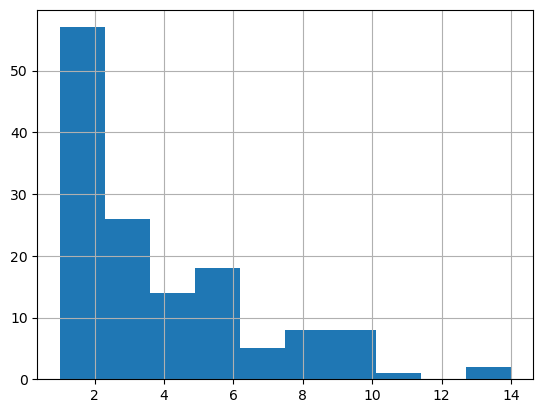

In [21]:
master_three_way_trades_df['count'].hist()

In [22]:
master_three_way_trades_df['count'].mean(), master_three_way_trades_df['count'].median()

(3.870503597122302, 3.0)

#### HOARDING TASK 2

In [33]:
hoarded_items_dict = {}

for filename in game_trades_df_dict:
    print(filename)
    hoarded_items_dict[filename] = []
    # three_way_trades_dict[filename] = []
    trades_df = game_trades_df_dict[filename]
    player_names_list = list(set(player_profession_dict[filename].keys()))
    trades_df = get_request_non_useful_items(trades_df, player_names_list, player_profession_dict, profession_items_dict, filename)
    # print(trades_df.columns)

    if ('requestedInventory' not in trades_df.columns) or ('requestedInventory' not in trades_df.columns):
        print('no requestedInventory/requesterInventory')
        continue
        
    for player in player_names_list:
        player_profession = player_profession_dict[filename][player]
        player_useful_items = profession_items_dict[player_profession]
        x_df = trades_df[(trades_df['requester']==player) | (trades_df['requested']==player)]
        print(player)
        row1 = x_df.iloc[0, :]
        p1 = row1['requester']
        p2 = row1['requested']
        if p1 == player:
            # first trade as requester, check requesterInventory
            player_inventory1 = row1['requesterInventory']
        else:
            # first trade as requested, check requestedInventory
            player_inventory1 = row1['requestedInventory']
        
        row2 = x_df.iloc[-1,:]
        p1 = row2['requester']
        p2 = row2['requested']
        if p1 == player:
            # first trade as requester, check requesterInventory
            player_inventory2 = row2['requesterInventory']
        else:
            # first trade as requested, check requestedInventory
            player_inventory2 = row2['requestedInventory']

        player_start_inventory_dict = {}
        for ent in player_inventory1:
            if ent['resource'] not in player_start_inventory_dict:
                player_start_inventory_dict[ent['resource'].lower().replace(' ', '_')] = 0
            player_start_inventory_dict[ent['resource'].lower().replace(' ', '_')] += ent['amount']

        player_end_inventory_dict = {}
        for ent in player_inventory2:
            if ent['resource'] not in player_end_inventory_dict:
                player_end_inventory_dict[ent['resource'].lower().replace(' ', '_')] = 0
            player_end_inventory_dict[ent['resource'].lower().replace(' ', '_')] += ent['amount']

        total_items_list = list(set(player_start_inventory_dict.keys()) | set(player_end_inventory_dict.keys()))
        total_items_list = [item.lower().replace(' ', '_') for item in total_items_list]
        nonuseful_items_list = [item for item in total_items_list if item not in player_useful_items]
        nonuseful_items_list = [item for item in nonuseful_items_list if (
            item in itemTierValue_dict)]
        print('nonuseful_items = ', nonuseful_items_list)

#         num_trades = 0
#         for ind, row in x_df.iterrows():
#             p1 = row['requester']
#             p2 = row['requested']
#             if p1 == player:
#                 # first trade as requester, check requesterInventory
#                 player_nonuseful = row['requester_nonuseful']
#                 player_receiving_items_dict = {ent['resource'].lower().replace(' ', '_'): ent['amount'] for ent in row['request']}
#                 player_receiving_items_list = [ent['resource'].lower().replace(' ', '_') for ent in row['request']]
#                 print(ind, player_nonuseful, player_receiving_items_dict)
#             if p2 == player:
#                 # first trade as requester, check requesterInventory
#                 player_nonuseful = row['requested_nonuseful']
#                 player_receiving_items_dict = {ent['resource'].lower().replace(' ', '_'): ent['amount'] for ent in row['offer']}
#                 player_receiving_items_list = [ent['resource'].lower().replace(' ', '_') for ent in row['offer']]
#                 print(ind, player_nonuseful, player_receiving_items_dict)
#             if player_nonuseful != []:
#                 # some nonuseful item in trade
#                 hoarding_list = [item for item in player_nonuseful if item in nonuseful_items_list]
#                 if hoarding_list != []:
#                     # hoarding exists, add this trade into count
#                     print('hoarding_list: ', hoarding_list)
#                     if set(player_nonuseful) == set(player_receiving_items_list):
#                         num_trades += 1
        
        hoarded_items_list = []
        hoarded_score = 0
        for item in nonuseful_items_list:
            dct = {}
            # print(item in 
            if item in player_end_inventory_dict:
                print(item, ' end ', player_end_inventory_dict[item])
                if item not in dct:
                    dct = {item: 0}
                dct[item] += player_end_inventory_dict[item]
                if item in player_start_inventory_dict:
                    dct[item] -= player_start_inventory_dict[item]
                    print(item, ' start ', player_start_inventory_dict[item])    
                if dct[item] > 0:
                    if item in itemTierValue_dict:
                        hoarded_score += (dct[item]*itemTierValue_dict[item]['value'])
                    else:
                        # use exp.xlsx
                        if item in tier1_items_list:
                            hoarded_score += (dct[item] * TIER1_VALUE)
                        elif item in tier2_items_list:
                            hoarded_score += (dct[item] * TIER2_VALUE)
                        elif item in tier3_items_list:
                            hoarded_score += (dct[item] * TIER3_VALUE)
                        else:
                            # unable to find this item in the tier value directory
                            print('unable to find tier value for item: ', item)
                if dct[item] > 0:
                    hoarded_items_list.append(dct)
        num_trades = 0
        hoarded_score_2 = 0
        ls = [list(ent.keys())[0] for ent in hoarded_items_list]
        hoarded_items_list_2 = {}
        for ind, row in x_df.iterrows():
            p1 = row['requester']
            p2 = row['requested']
            if p1 == player:
                # first trade as requester, check requesterInventory
                player_nonuseful = row['requester_nonuseful']
                player_receiving_items_dict = {ent['resource'].lower().replace(' ', '_'): ent['amount'] for ent in row['request']}
                player_receiving_items_list = [ent['resource'].lower().replace(' ', '_') for ent in row['request']]
                print(ind, player_nonuseful, player_receiving_items_dict)
            if p2 == player:
                # first trade as requester, check requesterInventory
                player_nonuseful = row['requested_nonuseful']
                player_receiving_items_dict = {ent['resource'].lower().replace(' ', '_'): ent['amount'] for ent in row['offer']}
                player_receiving_items_list = [ent['resource'].lower().replace(' ', '_') for ent in row['offer']]
                print(ind, player_nonuseful, player_receiving_items_dict)
            if player_nonuseful != []:
                # some nonuseful item in trade
                hoarding_list = [item for item in player_nonuseful if item in ls]
                if hoarding_list != []:
                    # hoarding exists, add this trade into count
                    print('hoarding_list: ', hoarding_list)
                    if set(player_nonuseful) == set(player_receiving_items_list):
                        num_trades += 1
                        print('num_trades = ', num_trades)
                        for item in player_receiving_items_dict:
                            if item not in hoarded_items_list_2:
                                hoarded_items_list_2[item] = 0                                
                            if item in itemTierValue_dict:
                                hoarded_score_2 += (player_receiving_items_dict[item]*itemTierValue_dict[item]['value'])
                                hoarded_items_list_2[item] += player_receiving_items_dict[item]
                            else:
                                # use exp.xlsx
                                if item in tier1_items_list:
                                    hoarded_score_2 += (player_receiving_items_dict[item] * TIER1_VALUE)
                                    hoarded_items_list_2[item] += player_receiving_items_dict[item]
                                elif item in tier2_items_list:
                                    hoarded_score_2 += (player_receiving_items_dict[item] * TIER2_VALUE)
                                    hoarded_items_list_2[item] += player_receiving_items_dict[item]
                                elif item in tier3_items_list:
                                    hoarded_score_2 += (dct[item] * TIER3_VALUE)
                                    hoarded_items_list_2[item] += player_receiving_items_dict[item]
                                else:
                                    # unable to find this item in the tier value directory
                                    print('unable to find tier value for item: ', item)
        if hoarded_score_2 < hoarded_score:
            hoarded_score = hoarded_score_2
            hoarded_items_list = hoarded_items_list_2

        if hoarded_score != 0:
            hoarded_items_dict[filename].append(
                {'player': player, 'items_list': hoarded_items_list, 'hoarded_score': hoarded_score,
                 'num_trades': num_trades, 'game_type': row1['game_type'],  'game_name': row1['game_name']})


Agents_A10
Sarah
nonuseful_items =  ['stick', 'tropical_fish', 'pumpkin', 'saddle', 'bread', 'lead', 'potato', 'wheat', 'string', 'cow_spawn_egg', 'leather', 'carrot', 'turtle_egg', 'loom']
stick  end  6
stick  start  6
pumpkin  end  3
pumpkin  start  3
saddle  end  1
saddle  start  1
bread  end  2
bread  start  2
lead  end  11
lead  start  11
potato  end  3
potato  start  3
wheat  end  6
wheat  start  6
string  end  2
string  start  2
cow_spawn_egg  end  1
carrot  end  3
carrot  start  3
turtle_egg  end  1
turtle_egg  start  2
loom  end  5
loom  start  5
2 ['string'] {'string': 1}
8 ['cow_spawn_egg'] {'cow_spawn_egg': 1}
hoarding_list:  ['cow_spawn_egg']
num_trades =  1
10 [] {'stone_pickaxe': 1}
16 [] {'quartz_block': 1}
27 [] {'quartz_block': 1}
34 [] {'quartz_block': 1}
37 [] {'glass': 1}
39 [] {'stone': 1}
43 [] {'red_glazed_terracotta': 1}
46 [] {'quartz_block': 1}
47 [] {'glass': 1}
Kalyani
nonuseful_items =  ['rabbit_hide', 'stick', 'saddle', 'pumpkin', 'lead', 'potato', 'blue_

Sarah
nonuseful_items =  ['tropical_fish', 'pumpkin', 'bread', 'salmon', 'pufferfish', 'white_wool', 'string', 'wheat', 'cod', 'cow_spawn_egg', 'mushroom_stew', 'carrot', 'loom', 'sheep_spawn_egg', 'shears']
pumpkin  end  8
pumpkin  start  8
bread  end  5
bread  start  5
salmon  end  5
salmon  start  5
pufferfish  end  1
pufferfish  start  1
white_wool  end  6
white_wool  start  6
string  end  1
string  start  1
wheat  end  4
cod  end  4
cod  start  4
cow_spawn_egg  end  1
cow_spawn_egg  start  1
carrot  end  1
carrot  start  6
loom  end  1
loom  start  1
sheep_spawn_egg  end  1
shears  end  1
0 [] {'stone_pickaxe': 1}
2 ['bread'] {'bread': 1}
5 ['shears'] {'shears': 1}
hoarding_list:  ['shears']
num_trades =  1
12 [] {'red_glazed_terracotta': 1}
13 [] {'red_glazed_terracotta': 1}
15 [] {'stone': 5}
19 [] {'stone': 5}
21 ['shears'] {'shears': 1}
hoarding_list:  ['shears']
num_trades =  2
24 ['sheep_spawn_egg'] {'sheep_spawn_egg': 1}
hoarding_list:  ['sheep_spawn_egg']
num_trades =  3
3

Sarah
nonuseful_items =  ['pumpkin', 'bread', 'oak_planks', 'wheat', 'stone', 'mushroom_stew', 'red_glazed_terracotta', 'tropical_fish', 'salmon', 'potato', 'diamond_axe', 'blue_glazed_terracotta', 'oak_boat', 'spruce_log', 'birch_log', 'cod', 'glass', 'carrot', 'turtle_egg', 'oak_log']
bread  end  3
bread  start  3
wheat  end  1
wheat  start  1
stone  end  6
stone  start  6
mushroom_stew  end  1
mushroom_stew  start  1
red_glazed_terracotta  end  5
red_glazed_terracotta  start  5
tropical_fish  end  3
tropical_fish  start  3
salmon  end  2
salmon  start  2
potato  end  1
potato  start  1
blue_glazed_terracotta  end  1
blue_glazed_terracotta  start  1
oak_boat  end  1
oak_boat  start  1
spruce_log  end  15
spruce_log  start  16
cod  end  2
cod  start  2
glass  end  12
glass  start  12
carrot  end  3
carrot  start  3
turtle_egg  end  5
turtle_egg  start  2
oak_log  end  19
oak_log  start  19
3 [] {'chicken': 1}
7 [] {'cooked_beef': 1}
10 [] {'beef': 1}
14 [] {'beef': 3}
16 [] {'porkchop

Sarah
nonuseful_items =  ['blue_dye', 'stick', 'lead', 'diamond_sword', 'white_wool', 'blue_glazed_terracotta', 'cow_spawn_egg', 'coal', 'iron_ingot', 'sheep_spawn_egg', 'loom', 'fletching_table', 'stone_pickaxe', 'quartz_block']
blue_dye  end  1
blue_dye  start  1
stick  end  2
stick  start  2
lead  end  9
lead  start  9
diamond_sword  end  1
diamond_sword  start  1
white_wool  end  2
white_wool  start  2
blue_glazed_terracotta  end  1
blue_glazed_terracotta  start  1
cow_spawn_egg  end  1
cow_spawn_egg  start  1
iron_ingot  end  2
iron_ingot  start  3
sheep_spawn_egg  end  7
sheep_spawn_egg  start  7
loom  end  1
loom  start  3
fletching_table  end  5
fletching_table  start  5
quartz_block  end  9
quartz_block  start  9
3 [] {'cooked_porkchop': 1}
4 [] {'porkchop': 1}
8 [] {'cooked_beef': 2}
10 [] {'cooked_beef': 1}
13 [] {'rabbit_stew': 1}
20 [] {'chicken': 1}
25 ['iron_ingot'] {'iron_ingot': 1}
30 ['iron_ingot'] {'iron_ingot': 1}
34 [] {'porkchop': 1}
39 [] {'cooked_porkchop': 1}
5

Sarah
nonuseful_items =  ['rabbit_hide', 'beef', 'pumpkin', 'bread', 'lead', 'rabbit_stew', 'wheat', 'gold_ingot', 'cooked_beef', 'cow_spawn_egg', 'coal', 'mushroom_stew', 'fletching_table', 'stick', 'diamond_sword', 'potato', 'porkchop', 'chicken', 'iron_ingot']
beef  end  1
beef  start  1
pumpkin  end  3
pumpkin  start  3
lead  end  6
lead  start  6
rabbit_stew  end  1
rabbit_stew  start  1
wheat  end  8
wheat  start  8
gold_ingot  end  3
gold_ingot  start  1
cooked_beef  end  3
cow_spawn_egg  end  1
cow_spawn_egg  start  1
coal  end  4
coal  start  4
mushroom_stew  end  1
mushroom_stew  start  1
fletching_table  end  3
fletching_table  start  2
stick  end  1
stick  start  1
diamond_sword  end  1
potato  end  17
potato  start  17
porkchop  end  7
porkchop  start  7
chicken  end  3
chicken  start  3
iron_ingot  end  5
iron_ingot  start  5
8 ['cooked_beef'] {'cooked_beef': 1}
hoarding_list:  ['cooked_beef']
num_trades =  1
13 ['cooked_porkchop'] {'cooked_porkchop': 1}
15 ['gold_ingot']

Sarah
nonuseful_items =  ['pumpkin', 'bread', 'rabbit_stew', 'potato', 'porkchop', 'diamond_axe', 'blue_glazed_terracotta', 'wheat', 'chicken', 'spruce_log', 'cooked_beef', 'birch_log', 'carrot', 'stone_pickaxe', 'red_glazed_terracotta', 'quartz_block']
pumpkin  end  3
pumpkin  start  3
bread  end  1
rabbit_stew  end  1
rabbit_stew  start  1
porkchop  end  3
porkchop  start  3
blue_glazed_terracotta  end  4
blue_glazed_terracotta  start  4
chicken  end  1
chicken  start  1
spruce_log  end  19
spruce_log  start  19
birch_log  end  9
birch_log  start  9
carrot  end  3
carrot  start  3
red_glazed_terracotta  end  1
red_glazed_terracotta  start  1
quartz_block  end  1
3 ['quartz_block'] {'quartz_block': 1}
hoarding_list:  ['quartz_block']
num_trades =  1
15 [] {'iron_ingot': 1}
26 [] {'iron_ingot': 1}
27 ['bread'] {'bread': 1}
hoarding_list:  ['bread']
num_trades =  2
29 ['spruce_log'] {'spruce_log': 18}
62 ['blue_glazed_terracotta'] {'blue_glazed_terracotta': 1}
64 [] {'fletching_table': 

Sarah
nonuseful_items =  ['blue_dye', 'saddle', 'pumpkin', 'bread', 'lead', 'string', 'shears', 'stick', 'tropical_fish', 'potato', 'white_wool', 'cod', 'leather', 'carrot', 'turtle_egg', 'sheep_spawn_egg', 'loom']
blue_dye  end  3
blue_dye  start  3
pumpkin  end  5
pumpkin  start  6
bread  end  1
bread  start  1
lead  end  1
lead  start  2
string  end  12
string  start  12
shears  end  1
shears  start  1
stick  end  1
stick  start  1
tropical_fish  end  3
tropical_fish  start  3
potato  end  1
potato  start  1
cod  end  4
cod  start  4
leather  end  5
leather  start  5
carrot  end  8
carrot  start  9
turtle_egg  end  2
turtle_egg  start  2
sheep_spawn_egg  end  3
sheep_spawn_egg  start  6
loom  end  2
loom  start  2
3 [] {'birch_log': 1}
6 ['mushroom_stew'] {'mushroom_stew': 1}
10 [] {'birch_log': 1}
13 ['lead'] {'lead': 1}
16 [] {'spruce_log': 8}
17 [] {'diamond_axe': 1}
19 [] {'birch_log': 1}
24 [] {'spruce_log': 1}
26 [] {'oak_log': 1}
29 [] {'spruce_log': 9}
33 [] {'oak_log': 1}
3

Sarah
nonuseful_items =  ['tropical_fish', 'lead', 'potato', 'oak_planks', 'diamond_axe', 'oak_boat', 'spruce_log', 'birch_log', 'cod', 'cow_spawn_egg', 'spruce_planks', 'mushroom_stew', 'oak_log']
tropical_fish  end  3
tropical_fish  start  8
lead  end  7
potato  end  16
potato  start  16
oak_planks  end  6
oak_planks  start  6
diamond_axe  end  1
diamond_axe  start  1
spruce_log  end  1
spruce_log  start  1
birch_log  end  6
birch_log  start  6
cow_spawn_egg  end  1
cow_spawn_egg  start  1
spruce_planks  end  2
spruce_planks  start  2
mushroom_stew  end  1
mushroom_stew  start  1
oak_log  end  3
oak_log  start  3
7 [] {'string': 1}
11 [] {'blue_dye': 1}
18 [] {'string': 5}
20 [] {'white_wool': 4}
24 [] {'white_wool': 5}
36 [] {'string': 4}
45 ['tropical_fish'] {'tropical_fish': 3}
46 ['lead'] {'lead': 12}
hoarding_list:  ['lead']
num_trades =  1
48 [] {'string': 5}
59 ['rabbit_hide'] {'rabbit_hide': 7}
Kalyani
nonuseful_items =  ['rabbit_hide', 'blue_dye', 'stick', 'bread', 'lead', '

In [34]:
hoarded_items_dict

{'Agents_A10': [{'player': 'Sarah',
   'items_list': [{'cow_spawn_egg': 1}],
   'hoarded_score': 3,
   'num_trades': 1,
   'game_type': 'Competitive',
   'game_name': 'A10'},
  {'player': 'Lamar',
   'items_list': [{'pumpkin': 1}],
   'hoarded_score': 3,
   'num_trades': 1,
   'game_type': 'Competitive',
   'game_name': 'A10'}],
 'Agents_A3': [{'player': 'Kalyani',
   'items_list': [{'pufferfish': 1}],
   'hoarded_score': 3,
   'num_trades': 1,
   'game_type': 'Competitive',
   'game_name': 'A3'},
  {'player': 'Lamar',
   'items_list': [{'tropical_fish': 1}, {'cod': 3}],
   'hoarded_score': 4,
   'num_trades': 5,
   'game_type': 'Competitive',
   'game_name': 'A3'}],
 'Agents_A4': [{'player': 'Sarah',
   'items_list': [{'wheat': 4}, {'sheep_spawn_egg': 1}, {'shears': 1}],
   'hoarded_score': 17,
   'num_trades': 7,
   'game_type': 'Competitive',
   'game_name': 'A4'},
  {'player': 'Kalyani',
   'items_list': [{'mushroom_stew': 1}, {'carrot': 1}],
   'hoarded_score': 11,
   'num_trades'

In [35]:
hoarded_items_df_dict = {filename: df.from_records(hoarded_items_dict[filename]) for filename in hoarded_items_dict if hoarded_items_dict[filename] != []}
hoarded_items_df_dict.keys()

dict_keys(['Agents_A10', 'Agents_A3', 'Agents_A4', 'Agents_A5', 'Agents_A6', 'Agents_A7', 'Agents_A8', 'Agents_A9', 'Agents_B10', 'Agents_B3', 'Agents_B4', 'Agents_B5', 'Agents_B6', 'Agents_B7', 'Agents_B8', 'Agents_B9', 'Agents_C1', 'Agents_C2', 'Agents_C3', 'Agents_C4', 'Agents_C5', 'Agents_C6', 'Agents_C7', 'Agents_C8'])

In [36]:
master_hoarded_items_df = df(columns=hoarded_items_df_dict[filename].columns)
print(master_hoarded_items_df.shape)
for filename in hoarded_items_df_dict:
    master_hoarded_items_df = pd.concat([master_hoarded_items_df, hoarded_items_df_dict[filename]])
    print(filename, hoarded_items_df_dict[filename].shape, master_hoarded_items_df.shape)    
master_hoarded_items_df

(0, 6)
Agents_A10 (2, 6) (2, 6)
Agents_A3 (2, 6) (4, 6)
Agents_A4 (3, 6) (7, 6)
Agents_A5 (5, 6) (12, 6)
Agents_A6 (4, 6) (16, 6)
Agents_A7 (4, 6) (20, 6)
Agents_A8 (3, 6) (23, 6)
Agents_A9 (4, 6) (27, 6)
Agents_B10 (2, 6) (29, 6)
Agents_B3 (2, 6) (31, 6)
Agents_B4 (2, 6) (33, 6)
Agents_B5 (4, 6) (37, 6)
Agents_B6 (4, 6) (41, 6)
Agents_B7 (5, 6) (46, 6)
Agents_B8 (4, 6) (50, 6)
Agents_B9 (4, 6) (54, 6)
Agents_C1 (4, 6) (58, 6)
Agents_C2 (4, 6) (62, 6)
Agents_C3 (1, 6) (63, 6)
Agents_C4 (4, 6) (67, 6)
Agents_C5 (2, 6) (69, 6)
Agents_C6 (3, 6) (72, 6)
Agents_C7 (3, 6) (75, 6)
Agents_C8 (2, 6) (77, 6)


,player,items_list,hoarded_score,num_trades,game_type,game_name
0,Sarah,[{'cow_spawn_egg': 1}],3,1,Competitive,A10
1,Lamar,[{'pumpkin': 1}],3,1,Competitive,A10
0,Kalyani,[{'pufferfish': 1}],3,1,Competitive,A3
1,Lamar,"[{'tropical_fish': 1}, {'cod': 3}]",4,5,Competitive,A3
0,Sarah,"[{'wheat': 4}, {'sheep_spawn_egg': 1}, {'shear...",17,7,Competitive,A4
...,...,...,...,...,...,...
0,Lamar,[{'cooked_beef': 1}],3,1,Cooperative,C7
1,Alan,[{'sheep_spawn_egg': 1}],3,1,Cooperative,C7
2,Sokka,[{'cod': 1}],1,1,Cooperative,C7
0,Lamar,[{'quartz_block': 2}],2,2,Cooperative,C8


In [37]:
master_hoarded_items_df.to_excel('Agents-Hoarding-Items-df_updated.xlsx')

In [15]:
game_trades_df_dict.keys()

dict_keys(['Agents_A10', 'Agents_A3', 'Agents_A4', 'Agents_A5', 'Agents_A6', 'Agents_A7', 'Agents_A8', 'Agents_A9', 'Agents_B10', 'Agents_B3', 'Agents_B4', 'Agents_B5', 'Agents_B6', 'Agents_B7', 'Agents_B8', 'Agents_B9', 'Agents_C1', 'Agents_C2', 'Agents_C3', 'Agents_C4', 'Agents_C5', 'Agents_C6', 'Agents_C7', 'Agents_C8'])

In [ ]:
game_trades_df_dict['']